# Hito 1: Ofertas laborales en EEUU 2021
Loreto Palma, Catalina Rojas, Maximiliano Jorquera, Gabriela Mora, Bastián Pezoa

Octubre 2021

# 1. Introducción

En el presente informe se expondrá la motivación del grupo por elegir este set de datos, los datos escogidos y su exploración. Los datos corresponden a la recopilación de ofertas de trabajos en Estados Unidos durante el año 2021, que incluye información sobre las ofertas laborales y distintos atributos que la componen.

Se hizo una exploración de datos para ver los primeros rasgos del dataset, lograr entenderlos de mejor manera, conocer en profundidad la base de datos, tener conocimientos de las características y atributos con los que se iban a trabajar y hacer las transformaciones necesarias para poder trabajar con ellos y obtener la información que se quiere buscar.

La motivación nace a raíz de lo cerca que tenemos el mundo laboral, que actualmente está sufriendo distintas modificaciones y se va adaptando rápidamente a las necesidades de la sociedad, es por eso que como grupo nos interesa mucho tener algún conocimiento sobre cuales son las tendencias actuales, qué es lo que se está buscando y cómo están siendo remuneradas y valoradas distintas habilidades. 

Se escogió un dataset de Estados Unidos, ya que siempre se ha visto como un país que ofrece buenas oportunidades laborales y uno de los destinos favoritos a la hora de desarrollarse en el ámbito profesional, además, actualmente vivimos en un mundo globalizado, en donde tener una experiencia internacional impulsa de gran manera tanto el desarrollo profesional como el personal. Con el paso del tiempo, crece el número de personas que están trabajando o estudiando en un país distinto al de origen, por lo que tener la oportunidad de hacer este análisis es fundamental para descubrir *insights* y poder tomar decisiones futuras.

# 2. Exploración de datos

El dataset con el que se trabajará fue obtenido de Kaggle. Los datos recopilados en este dataset corresponden a ofertas de trabajo posteadas en diversas páginas de búsqueda de empleo en Estados Unidos.

Importamos las librerias y el dataset:

In [ ]:
#standard import form used
import pandas as pd 
import numpy as np

In [ ]:
# Importamos el dataset
#best_jobsUS_df = pd.read_csv(r"C:\Users\basti\Desktop\DataSet\DE_R\Best_Jobs.csv", sep=',') para Jupyter
best_jobsUS_df = pd.read_csv("/content/sample_data/Best_Jobs.csv", sep=';', engine='python', error_bad_lines=False) 
best_jobsUS_df = best_jobsUS_df.rename(columns={"_id": "id", "Column1": "wage_type"})
best_jobsUS_df.index = pd.DatetimeIndex(best_jobsUS_df["posted_at"])
best_jobsUS_df.head()

ParserError: ignored

## 2.1 Limpieza de datos

Atributos y que representan:

<ul>
    <li>salary = Salario en dolares
    <li>wage_type = Tipo de salario declarado. Salario por hora o por año.
    <li>education = Grado de educación requerido para postular al trabajo
    <li>crawled_at = Fecha en que el dato fue recopilado
    <li>description = Descripción de la oferta de trabajo
    <li>title = Titulo del cargo o trabajo
    <li>skills = Habilidades deseadas para desempeñar el cargo
    <li>country = País de recopilación del dato
    <li>locality = Ciudad en donde se requiere el cargo de trabajo
    <li>posted_at = Fecha en la que fue posteada la oferta de trabajo
    <li>region = Estado de la ciudad en donde se requiere el cargo de trabajo
    <li>experience = Experiencia mínima solicitada por el empleador para el trabajo
    <li>employment_type = Tipo de empleo.
    <li>company = Nombre de la compañia que realiza la oferta laboral
    <li>str_salary = Indica si la oferta de trabajo original declaraba el sueldo en tipo string o no
    <li>reported_salary = Salario declarado en la oferta de trabajo
    <li>normalized = Salario normalizado a sueldo por año     
</ul>

### Datos eliminados

El dataset contaba con 19 atributos inicialmente, de los cuales se eliminaron 7 que contenian datos que no aportaban información al análisis de estos, o que eran, más bien, datos técnicos que ayudaban con la recopilación de la información para el dataset. 

Por el lado de las filas del dataset, se eliminaron las filas que contenian datos inconsistentes en el atributo salary. Estas contenían información en lenguaje de marcado y carácteres codificados erróneamente, y no se podía inferir si eran datos numéricos o strings, por lo que se decidió borrar para el posterior análisis. También fueron eliminadas filas que contenian datos de ofertas de trabajo de otros paises, pues estás eran una cantidad mínima.

### Columna Salary

En la columna se encontraban datos en forma de str, datos numéricos en intervalos y NA, los últimos se interpretaron como salarios que no fueron declarados por las compañías y se rellenaron con el string not_reported. 

En los datos numéricos en intervalos se decidió tomar el valor máximo de los intervalos y se separaron en 2 columnas los datos de la columna salary. Una columna salary que contiene los datos originales y otra columna que contiene los valores numéricos normalizados, pasando todos los salarios a unidad de año, llamada normalized, donde los valores 0 de la columna corresponden a las filas que contienen salarios reportados con caracteres del abecedario en la columna salary.




## 2.2 Estadísticas

Para tener una visión general inicial sobre los datos se realizó un análisis simple de estos, de modo de poder ver la dimensión del dataset, qué tipo de datos contienen los atributos, cantidad de nulos por atributo, conteo de valores por atributo (que tanto se repiten ciertos valores en estos), cantidad de valores únicos en los atributos, entre otros:

Dimensiones del dataset:

In [ ]:
# (filas, atributos) del dataframe
best_jobsUS_df.shape

Tipos de datos en los atributos:

In [ ]:
# Tipo de dato de los valores almacenados en los atributos
best_jobsUS_df.dtypes

Información general sobre el dataframe:

In [ ]:
# Conteo de valores no nulos por atributo, tipo de dato por atributo, uso de memoria del dataframe
best_jobsUS_df.info()

Conteo de valores nulos por atributo del dataframe:

In [ ]:
# Conteo de valores nulos por atributo
best_jobsUS_df.isna().sum()

Conteo de sueldos normalizados:

In [ ]:
# Conteo de sueldos normalizados a sueldo por año
best_jobsUS_df['normalized'].value_counts(dropna=False)

Conteo de tipos de sueldos reportados:

In [ ]:
# Conteo de tipos de sueldo
best_jobsUS_df['wage_type'].value_counts(dropna=False)

Valores únicos en el atributo education:

In [ ]:
# Valores únicos sobre atributo education
c = best_jobsUS_df.education.unique()
print(c, '\n')

Conteo de valores sobre el atributo education:

In [ ]:
# Conteo de valores en education
best_jobsUS_df['education'].value_counts(dropna=False)

Valores únicos en el atributo experience:

In [ ]:
# Valores unicos en experience
a = best_jobsUS_df.experience.unique()
print(a, '\n')
# Cantidad de valores unicos en experience
print("Cantidad de valores unicos: ", len(a))

Conteo de valores sobre el atributo experience:

In [ ]:
# Conteo de valores en experience
best_jobsUS_df['experience'].value_counts(dropna=False)

Valores únicos en el atributo region:

In [ ]:
# Valores unicos en region
unique_region = best_jobsUS_df.region.unique()
print(unique_region, '\n')
print("Cantidad de valores unicos: ", len(unique_region))

Conteo de valores en el atributo region:

In [ ]:
# Conteo sobre los valores de region
best_jobsUS_df['region'].value_counts(dropna=True)

Se crean dos columnas con los valores de los salarios anuales y por hora, en donde los valores que no están disponibles están como nulos, para facilitar el cálculo de promedios.

- *yearly_salary*: salario obtenido en un año en USD.
- *hourly_salary*: salario obtenido por hora en USD.

Para esta normalización, se consideraron 40 horas de trabajo semanales, en 52 semanas por año. 

#### Función para normalizar los sueldos a un valor anual

In [ ]:
def salary_to_yearly(salary, wage_type):
  """
  Convierte los sueldos a un valor de sueldo por año.
  """
  if "year" in wage_type.lower():
    return float(salary)
  elif ("not_reported" not in wage_type.lower()) and ("hour" in wage_type.lower() or "hr" in wage_type.lower()):
    return float(salary)*40*52
  elif "week" in wage_type.lower():
    return float(salary)*52

In [ ]:
best_jobsUS_df['yearly_salary'] = best_jobsUS_df.apply(lambda x: 
                                                   salary_to_yearly(salary=x['reported_salary'], wage_type=x['wage_type']), axis=1)

#### Función para normalizar los sueldos a un valor por hora

In [ ]:
def salary_to_hourly(salary, wage_type):
  """
  Convierte los sueldos a un valor de sueldo por hora.
  """
  if "year" in wage_type.lower():
    return float(salary)/(40*52)
  elif ("not_reported" not in wage_type.lower()) and ("hour" in wage_type.lower() or "hr" in wage_type.lower()):
    return float(salary)
  elif "week" in wage_type.lower():
    return float(salary)/40

In [ ]:
best_jobsUS_df['hourly_salary'] = best_jobsUS_df.apply(lambda x: 
                                                   salary_to_hourly(salary=x['reported_salary'], wage_type=x['wage_type']), axis=1)

## 2.3 Atributo de mayor interés

Para hallar respuestas a las preguntas que se presentan, es de crucial importancia conocer la naturaleza de la varible salario. Al momento de hacer la limpieza de datos y la exploración, se encontraron 2 formas de representar los salarios de los puestos de trabajos:

1.   Declaran sueldo en hora o en año
2.   No declaran sueldo

Con el objetivo de facilitar el trabajo de la variable salario, es que se decidió separar el atributo en 2. Uno que mantuviera la naturaleza de la variable llamada salary y otra llamada normalized, que contiene la variable salario estandarizada a sueldo por año. En el último atributo mencionado, cuando la variable toma el valor 0 corresponde a casos donde el anuncio no declaraba sueldo. La distrubución de estas 2 formas de representar el sueldo se ve de la siguiente manera:



In [ ]:
#Grafico de frecuencia entre trabajos que declaran salario y los que no

salario=best_jobsUS_df['salary']
declaran=best_jobsUS_df['salary']!=0

In [ ]:
import matplotlib.pyplot as plt

df_notnull = best_jobsUS_df[best_jobsUS_df['yearly_salary'].notnull()]
notnull_values = df_notnull.shape[0]
null_values = best_jobsUS_df.shape[0] - notnull_values

x = ["Sin sueldo", "Con sueldo"]
y = [null_values, notnull_values] 
plt.title("Ofertas con y sin sueldo")
plt.ylabel("Cantidad")
plt.bar(x, y)
plt.show()

Por otra parte, la distribución de los sueldos de los empleos que lo declaran tiene la siguiente forma. La distribución de sueldo se ve muy dispersa al ser gráficada con el sueldo estandarizado por año, por lo que se prefirio utilizar la estandarización en hora:

In [ ]:
salario=best_jobsUS_df['salary']

In [ ]:
quantil = np.quantile(df_notnull['hourly_salary'], 0.75)
plt.hist(df_notnull['hourly_salary'], bins = 15, range = (0.1, quantil))
plt.xlabel("Hourly Salary")
plt.ylabel("Count")
plt.title("Distribución de sueldos hasta el 3er cuantil")
plt.show()

## 2.4 Palabras más frecuentes en los atributos


In [ ]:

!pip install gensim

from gensim.parsing.preprocessing import remove_stopwords, strip_punctuation
from gensim import utils
import nltk

from collections import Counter

# Funcion que remueve stopwords y puntuaciones de las palabras dentro de un
# string presente en una lista L
def preprocess(L):
  new_text = []
  for text in list(L):
    word = remove_stopwords(text)
    new_text.append(strip_punctuation(word))
  return new_text

# Funcion que deja en minusculas todas las palabras dentro de un string presente
# en una lista L
def toLowerCase(L):
  lowered = []
  for i in list(L):
    for word in i:
      lowered.append(i.lower())
  return lowered

new_text = preprocess(best_jobsUS_df["title"])
lowered = toLowerCase(new_text)

# Funcion que contea las n palabras más frecuentes dentro de un atributo L
def count_words(L, n):
    words = []
    for text in list(L): 
        for word in str(text).split():
            words.append(word)

    counter_words = Counter(words)
    pairs = counter_words.most_common(n)
    return pairs

Se calcularon las palabras más frecuentes en los atributos title, description y skills para tener un panorama de qué palabras deben ser filtradas a lo largo de la exploración, pues no aportan con información a esta:

1500 palabras más utilizadas en title:

In [ ]:
# 1500 palabras más frecuentes el atributo title
words_title = count_words(toLowerCase(preprocess(best_jobsUS_df['title'])), 1500)
# Mostramos las primeras 25 para evitar extension
words_title[:25]

2500 palabras más utilizadas en description:

In [ ]:
# 2500 palabras más frecuentes el atributo description
words_title = count_words(toLowerCase(preprocess(best_jobsUS_df['description'])), 1500)
# Mostramos las primeras 25 para evitar extension
words_description[:25]

3000 palabras más utilizadas en skills:

In [ ]:
# 3000 palabras más frecuentes el atributo skills
words_skills = words_title = count_words(toLowerCase(preprocess(best_jobsUS_df['skills'])), 1500)
# Mostramos las primeras 25 para evitar extension
words_skills[:25]

Con un panorama claro sobre que palabras eliminar, se procede a crear una nueva función que nos muestre las palabras más frecuentes en cada atributo, con el filtro aplicado. Para esto, necesitaremos pasar estas listas a diccionarios, para hacer más eficiente la eliminacion de las ocurrencias:

In [ ]:
dt_title = dict(words_title)
dt_description = dict(words_description)
dt_skills = dict(words_skills)

In [ ]:

# Elimina la llave i del diccionario D
def count_words_clean(D):
  for i in filter:
    D.pop(i, None)
  return D
  

Ahora, podemos ver las palabras más frecuentes de mejor manera:

In [ ]:
most_frec_title = count_words_clean(dt_title)
titles = list(dt_title.items())
titles[:25]

In [ ]:
most_frec_desc = count_words_clean(dt_description)
desc = list(dt_description.items())
desc[:25]

In [ ]:
most_frec_skills = count_words_clean(dt_skills)
skills = list(dt_skills.items())
skills[:25]

Con esto, se grafican las 15 palabras más frecuentes de cada atributo:

* Gráfico de barras para el atributo *title*:

In [ ]:
plt.figure(figsize=(7,10))
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
x = [titles[i][0] for i in range(0,15)]
y = [titles[i][1] for i in range(0,15)]
g= plt.barh(x, y, color='orange')
plt.title('15 palabras más frecuentes en atributo "title"')
plt.show()

Con esto, se logra ver claramente que durante el año 2021 las ofertas laborales dominantes han sido en las áreas de venta, gerencia y almacenamiento/bodegaje. Esto, probablemente debido al aumento, o boom, del e-commerce durante la pandemía que, hasta la fecha, sigue en curso.

* Gráfico de barras para el atributo *description*:

In [ ]:
plt.figure(figsize=(7,10))
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
x = [desc[i][0] for i in range(0,15)]
y = [desc[i][1] for i in range(0,15)]
g= plt.barh(x, y, color='pink')
plt.title('15 palabras más frecuentes en atributo "description"')
plt.show()

Dentro de las descripciones de los trabajos, se ve un uso muy frecuente de la palabra experiencia, cliente y equipo.

* Gráfico de barras para el atributo *skills*:

In [ ]:
plt.figure(figsize=(7,10))
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
x = [skills[i][0] for i in range(0,15)]
y = [skills[i][1] for i in range(0,15)]
g= plt.barh(x, y, color='purple')
plt.title('15 palabras más frecuentes en atributo "skills"')
plt.show()

A pesar de verse una clara dominancia de la *skill* de administración, las ofertas tienen un gran interés también en la comunicación y planificación, habilidades muy ligadas con la organización.

## 2.5 Correlación entre variables


El objetivo de esta sección de exploración, es encontrar correlaciones entre la variable normalized (salarios normalizados) y otras variables de nuestro interés. Esto con el propósito de estudiar con qué variables se relaciona el salario y saber si coincide con las variables que se pensaron.

Lo primero que se quería observar, era si el largo (cantidad de palabras) de la descripción estaba relacionado con el salario, para esto se creó la variable "word_count" que contaba la cantidad de palabras que tenía la descripción.

In [ ]:
best_jobsUS_df["word_count"] = best_jobsUS_df["description"].str.split().str.len()

In [ ]:
best_jobsUS_df.sample(10)

Luego se creó un dataframe en donde estaban las variables del salario normalizado: "normalized" y la variable recién creada "word_count"

In [ ]:
df_corr = pd.DataFrame(best_jobsUS_df, columns=['normalized', 'word_count'])

In [ ]:
df_corr.sample(10)

Finalmente, se calculó el coeficiente de correlación entre ambas variables

In [ ]:
df_corr.corr()

De los resultados se puede apreciar que el valor obtenido es muy cercano a 0, esto quiere decir que ambas variables no están correlacionadas, por lo que el largo de la descripción no está relacionado con el salario.

Otras variables que eran de interés eran: locality (ciudad de donde es la oferta), title (título del cargo) y education (nivel de educación requerido). Por lo que se estudió la correlación en R para ver si efectivamente estas variables estaban relacionadas con el salario.

Para obtener los coeficientes de correlación, en R se utilizó el comando corRatio de la librería DiscriMiner, este comando permite calcular coeficientes de correlación entre una variable numérica con una categórica, con el siguiente código y arrojando los siguientes resultados:

### corRatio

corRatio(Best_Jobs\$normalized, Best_Jobs\$locality) \\
corRatio(Best_Jobs\$normalized, Best_Jobs\$title) \\
corRatio(Best_Jobs\$normalized, Best_Jobs\$education) 

0.2498862 \\
0.812064 \\
0.1029589

Del resultado se puede apreciar que las variables locality y education están poco correlacionadas con el salario, mientras que title está muy correlacionado. Por lo que se concluye que el salario tiene mucha relación con el título del cargo con el que se postea la oferta.

## 2.6 Exploración sobre grado de educación, regiones y horas


En esta sección se quiere obtener cuáles eran los requisitos de educación más recurrentes en las ofertas de trabajo, las ciudades/estados con más ofertas y a qué hora eran publicadas con más frecuencia.

### Educación requerida en ofertas de trabajo

In [ ]:
education = best_jobsUS_df['education'].value_counts(dropna=True).rename_axis('Education').reset_index(name='Count')
education

In [ ]:
#Nivel de educación más y menos pedidos en las ofertas de trabajo
min_max_education = education.head(1).append(education.tail(2))
min_max_education

In [ ]:
import matplotlib.pyplot as plt

plt.barh(education['Education'], education['Count'])
plt.xlabel('Cantidad')
plt.ylabel('Educación')
plt.title('Educación requerida en ofertas de trabajo')
plt.show()

### Cantidad de ofertas de trabajo por región

In [ ]:
region = best_jobsUS_df['region'].value_counts(dropna=True).rename_axis('Region').reset_index(name='Count')
region.head(15)

In [ ]:
#Región con mayor y menor cantidad de ofertas de trabajo
min_max_region = region.head(1).append(region.tail(1))
min_max_region

In [ ]:
import matplotlib.pyplot as plt

plt.bar(region['Region'], region['Count'])
plt.rcParams["figure.figsize"] = (20, 13)
plt.ylabel('Cantidad')
plt.xlabel('Región')
plt.title('Cantidad de ofertas de trabajo por ciudad/estado')
plt.show()

### Hora de publicación

In [ ]:
#Cantidad de ofertas publicadas según hora
best_jobsUS_df['posted_at'] = pd.to_datetime(best_jobsUS_df.posted_at, format='%d-%m-%Y %H:%M', errors='coerce')
hours = best_jobsUS_df['posted_at'].dt.hour.value_counts(dropna=True).rename_axis('Hour').reset_index(name='Count')
hours

In [ ]:
#Horas con mayor y menor número de publicaciones de ofertas de trabajo
hours_ordered = hours.sort_values(['Count'], ascending=False)
hours_ordered_table = hours_ordered.head(1).append(hours_ordered.tail(1))
hours_ordered_table

In [ ]:
import matplotlib.pyplot as plt

plt.bar(hours['Hour'], hours['Count'])
plt.xticks(list(hours['Hour']))
plt.ylabel('Cantidad')
plt.xlabel('Horas')
plt.title('Horas en que se publican las ofertas de trabajo')
plt.show()

## 2.7 Sueldos según la ubicación

Considerando que tenemos la información geográfica de cada oferta de trabajo, un análisis interesante que se puede hacer es en base al sueldo promedio que se registra en cada estado. 



#### Salario promedio en los Estados Unidos

In [ ]:
hour = best_jobsUS_df['hourly_salary'].mean()
print("El salario promedio/hora calculado es de: ", round(hour, 1), "USD")
year = best_jobsUS_df['yearly_salary'].mean()
print("El salario promedio/año calculado es de: ", round(year, 1), "USD")

En base a estos cálculos, el salario promedio anual es de 60908.3 USD, mientras el que el salario promedio por hora es de 29.3 USD.

Una vez obtenidos estos datos, pasamos al análisis de los sueldos, considerando el la ubicación geográfica de la oferta.

#### Salario promedio según el estado

En primer lugar, antes de calcular los valores promedio, calculamos cuantos datos de sueldos tenemos para cada estado. La idea es que se consideren solo aquellos estados que tengan la suficiente cantidad de datos para los promedios a mostrar. 


In [ ]:
jobs_salary = best_jobsUS_df[best_jobsUS_df['yearly_salary'].notnull()]
region_count = jobs_salary.groupby(['region']).size().reset_index(name='counts')
region_count['counts'].median()

Se obtiene que la mediana para la cantidad de valores por estado es de 29, por lo que para los siguientes análisis se considerarán solo los estados que tengan más de 16 valores de salarios.



In [ ]:
region_count_filtered = region_count.loc[region_count['counts'] >= 22]
best_jobs_filtered = best_jobsUS_df[best_jobsUS_df['region'].isin(list(region_count_filtered['region']))]
best_jobs_filtered = best_jobs_filtered[best_jobs_filtered['yearly_salary'].notnull()]

Una vez tenemos filtrados los datos, tanto las regiones con el conteo mínimo definido, como los salarios anuales no nulos, calculamos cual es el sueldo promedio anual por estado de USA.

In [ ]:
region_mean_salary = best_jobs_filtered.groupby('region', as_index=False)['yearly_salary'].mean()
region_mean_salary.sort_values(by=['yearly_salary'], ascending=False)

En base a este análisis, podemos observar que los 5 estados con mayor sueldo promedio anualmente son: 

- Massachusetts
- Colorado
- Tennnesee
- Michigan 
- Virginia

# 3. Preguntas y problemas

En base a la exploración y analísis de los datos, en conjunto con la motivación expresada, se plantean las siguientes preguntas a intentar resolver en este proyecto:

* ¿Se puede predecir el sueldo con las variables descripción de la oferta, ubicación del trabajo, área de interés, hora y skills? 

* Si tengo un conjunto de skills, ¿qué skill podría desarrollar para optar a un mejor sueldo?

* ¿Existe alguna relación entre la localización del trabajo y el rol que se está buscando en la oferta?

# 4. Contribuciones

* Maximiliano Jorquera: Estuvo a cargo de la introducción y la correlación entre variables.
* Catalina Rojas: Estuvo a cargo de la exploracion sobre grado de educación, regiones y horas.
* Loreto Palma: Estuvo a cargo del análisis de sueldos según la ubicación y de la normalización de los valores en el atributo salary.
* Gabriela Mora: Estuvo a cargo de la limpieza de datos y del apartado de atributos con mayor intéres.
* Bastián Pezoa: Estuvo a cargo del apartado de Estadísticas y palabras más frecuentes en los atributos.

Y entre todos, se discutieron las preguntas y problemas, y se redactó el presente informe.

# Hito 2


# 1. Mejoras Hito 1

Con respecto a las mejoras del Hito 1, 

Lo primero que se hizo fue cambiar la formulación de las preguntas, por lo que quedaron de la siguiente manera:

1.  ¿Se puede predecir el sueldo respecto a variables geográficas y aquellas extraídas de la oferta publicada?

2. Si tengo un conjunto de skills, ¿Qué skill podría desarrollar para optar a un mejor sueldo?

3. ¿Existen factores que permitan describir la oferta laboral y la localización del trabajo?

Analizando los datos disponibles y las preguntas que queríamos responder, no fue necesario incluir otro dataset

Para incluir los comentarios del equipo docente y de nuestros compañeros hicimos lo siguiente:

- En las variables de texto se utilizaron Stopword, para eliminar las palabras que no tenían significado por sí mismas y no aportaban al análisis. Se realizó solamente en esta variable porque se necesitaba para el procesamitno del modelo y responder la pregunta 1 (pregunta elegida para desarrollar), se espera hacer lo mismo para las variables necesarias para responder las siguientes preguntas en la próxima entrega.

- Se incluyó análisis de bigramas en la variable título del trabajo (title), con el objetivo de hacer los análisis necesarios para la pregunta 1, se espera que para las siguientes preguntas se haga un análisis similar paera poder responderlas con la información que más agrega valor. El desarrollo de esta sección se encuentra en los resultados preliminares de la pregunta 1. 

- Se creó una nueva columna _hourly_salary_ con los salarios normalizados por hora, esta vez considerando una diferencia entre los trabajos _full time_ y _part time_.

# 2. Propuesta metodológica experimental inicial:

## Pregunta 1

1. ¿Se puede predecir el sueldo respecto a variables geográficas y aquellas extraídas de la oferta publicada?

En el dataset existen muchas variables de texto, por lo que se hará una limpieza. Se usó stopword, luego se removieron todas las puntuaciones y por último, se puso en minúscula para dejar todas las variables de texto en lenguaje de procesamiento natural. Este procesamiento fue con el objetivo de poder hacer clustering en la variable para poder definir sectores de trabajo de manera automática y no manual.

El proceso de clustering que se siguió consiste en iniciar un vectorizador de la frecuencia del documento de frecuencia inversa (tf-idf) y luego se convirtió el vector del título de las descripciones en una matriz tf-idf.
Para obtener la matriz Tf-idf, se cuentan las apariciones de palabras que hay en el vector que contiene los títulos de las publicaciones.  Esto también se llama matriz de frecuencia de términos. La forma en que se rellena la matriz consiste en ponderar la frecuencia de de las palabras en el vector con frecuencia inversa, o sea, las palabras que aparecen con frecuencia dentro de un string, pero no con frecuencia dentro del corpus reciben una ponderación más alta ya que se supone que estas palabras contienen más significado en relación al string de la tupla. 



Enfocándonos en las variables numéricas, para tener un mejor resultado normalizaremos nuevamente la variable de salario, ya que antes no considerábamos que habían salarios para trabajos part time y full time, una vez normalizados, se eliminarán los outliers. Además, se crearán nuevas variables que ayudarán a segmentar la variable de horas.

Nos focalizaremos en clasificación, proponemos utilizar el dataset para crear un modelo que permita predecir el sueldo a partir del conjunto de variables que nos entrega el dataset (dejando fuera de este análisis a las skills)
Para evaluar la calidad de la clasificación compararemos diversos algoritmos, utilizaremos métricas como F1, precision y recall, aplicando k-fold cross validation o un particionado de 70-30 para entrenamiento y testeo respectivamente. Además de probar el modelo con overfittnig y underfitting y con distintas variables.

Para realizar el modelo de clasificación, realizaremos clusters de acuerdo a los sectores de trabajo, que servirán como input para el modelo
Probaremos combinaciones en el número de clúster y distintos enfoques de clustering. Usaremos distintos subconjuntos de atributos para evaluar la agrupación de elementos. Para evaluar los clusters, utilizaremos el enfoque visual así como también la estimación de métricas tales como cohesión y separación.


## Pregunta 2

Si tengo un conjunto de skills, ¿Qué skill podría desarrollar para optar a un mejor sueldo?

Objetivo

- Predecir el sueldo en base a las skills
- Según el sueldo predecir qué skills se deben tener
- Explorar clusters

En el dataset, la variable de skills contiene una lista de skills relacionadas al cargo, en el contexto de esta pregunta vamos a necesitar un mayor nivel de detalle para esta variable, por lo que se creará una variable por cada skill relacionada al cargo, por ejemplo, una instancia del dataset tiene la variable skills con los siguientes datos: Protocol (Science), Maintenance. Ahora esa instancia tendría 2 variables, una que contenga Protocol (Science) y otra que diga Maintenance. También, se le asignará una variable descriptiva a los sueldos, de esta manera se podrán clasificar de mejor manera, los sueldos se dividirán en tramos de: sueldo bajo, sueldo medio y sueldo alto.

Dado que esta pregunta  es de carácter predictivo, nos focalizaremos de manera particular en clasificación, donde proponemos utilizar nuestro dataset para crear un modelo que permita estimar el tramo de un sueldo (bajo, medio, alto) a partir de un conjunto de skills y también evaluar la opción inversa, es decir, si a partir del sueldo podemos estimar las skills necesarias.

Para evaluar la calidad de la clasificación compararemos diversos algoritmos, utilizaremos las métricas tradicionales como F1, precision y recall, aplicando k-fold cross validation o un particionado de 80-20 para entrenamiento y testeo respectivamente. Nuestra idea de esto es no sobre-ajustar el modelo y este aprenda de subsets de entrenamiento distintos.

También aplicaremos técnicas de clustering para encontrar de manera natural si las características de nuestro dataset son suficientes para encontrar grupos de skills similares teniendo en cuenta su sueldo (bajo, medio, alto) 

Probaremos múltiples combinaciones en el número de clúster así como distintos enfoques de clustering (jerárquico y particional). También probaremos usando distintos subconjuntos de atributos al hacer clustering para evaluar si los ejemplos se agrupan de manera distinta cuando consideramos información diferente.

Para evaluar los clusters, utilizaremos el enfoque visual así como también la estimación de métricas tales como cohesión y separación.


## Pregunta 3

¿Existen factores que permitan describir la oferta laboral y la localización del trabajo?

Objetivo

- Según la localidad y sus características, qué ofertas de trabajo son más probables de encontrar (algoritmo clasificador).

En el dataset, la variable title contiene el nombre del trabajo, en el contexto de esta pregunta vamos a necesitar agrupar los nombres de los trabajos en categorías, por lo que se creará una nueva variable para categorizar y agrupar los trabajos. También se evaluará añadir otro dataset con características de cada localidad, para ver si hay alguna correlación con la cantidad de habitantes, ingreso per cápita, etc.

Dado que esta pregunta es de carácter predictivo, nos focalizaremos de manera particular en clasificación, donde proponemos utilizar nuestro dataset para crear un modelo que permita estimar el tipo de trabajo a partir de la localidad y sus características.

Para evaluar la calidad de la clasificación compararemos diversos algoritmos, utilizaremos las métricas tradicionales como F1, precision y recall, aplicando k-fold cross validation o un particionado de 80-20 para entrenamiento y testeo respectivamente. Nuestra idea de esto es no sobre-ajustar el modelo y este aprenda de subsets de entrenamiento distintos.


# 3. Resultado preliminar Pregunta 1

## Mejora Normalización Hito 1

En esta sección se hizo el análisis para definir cuales sería las clases para la variable 'salary', así como también normalizar los valores ee esta variable, mejorando la normalización usada en el Hito 1.

In [ ]:
#standard import form used
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
best_jobs = pd.read_csv("/content/drive/MyDrive/Minería/Best_Jobs_act.csv", sep=';', engine='python', error_bad_lines=False) 
best_jobs.drop(best_jobs.iloc[:, 20:166], inplace = True, axis = 1)
best_jobs.head()

,salary,wage_type,education,crawled_at,description,title,skills,country,locality,posted_at,hora,segmento_hora,bloque_horario,region,experience,employment_type,company,str_salary,reported_salary,normalized
0,not_reported,not_reported,NaN,05-05-2021 3:18,This Dedicated truck driver position features ...,Class A CDL - Dedicated Truck Driver Lowe's,NaN,US,Scranton,01-05-2021,0:00:00,0 am,madrugada,PA,NaN,FULL_TIME,Schneider,TRUE,0,0.0
1,not_reported,not_reported,NaN,05-05-2021 3:02,What’s different about driving for Chalk Mount...,Local CDL A Truck Driver,"Protocol (Science), Maintenance",US,Godley,07-04-2021,0:01:00,0 am,madrugada,TX,At least 5 years experience.,FULL_TIME,Chalk Mountain Services of Texas,TRUE,0,0.0
2,not_reported,not_reported,NaN,05-05-2021 3:05,What’s different about driving for Chalk Mount...,CDL A Truck Driver - Home Daily!,"Protocol (Science), Maintenance",US,Sierra Blanca,07-04-2021,0:01:00,0 am,madrugada,TX,At least 5 years experience.,FULL_TIME,Chalk Mountain Services of Texas,TRUE,0,0.0
3,not_reported,not_reported,High School,05-05-2021 3:08,"Shifts: Overnight, Early Morning, Day, Evening...",Warehouse Handler (Hiring Immediately) - Earn ...,"Hardworking And Dedicated, Health Care Benefit...",US,Phoenix,04-05-2021,0:01:00,0 am,madrugada,AZ,NaN,FULL_TIME,Amazon,TRUE,0,0.0
4,not_reported,not_reported,NaN,05-05-2021 3:09,What’s different about driving for Chalk Mount...,CDL A Truck Driver - Home Daily!,"Protocol (Science), Maintenance",US,Spearman,07-04-2021,0:01:00,0 am,madrugada,TX,At least 5 years experience.,FULL_TIME,Chalk Mountain Services of Texas,TRUE,0,0.0


Se lee la base de datos a la cual se le ha añadido información sobre el tiempo de la publicación de la oferta. Se hizo una pequeña exploración de los datos para ver cuántas filas se tiene, los tipos de trabajo que se ofrecen en 'employment_type' y el tipo de dato de cada columna.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
best_jobs.shape

(10392, 20)

In [ ]:
interns = best_jobs['employment_type']=='INTERN'
intern_filter = best_jobs[interns]
intern_filter

,salary,wage_type,education,crawled_at,description,title,skills,country,locality,posted_at,hora,segmento_hora,bloque_horario,region,experience,employment_type,company,str_salary,reported_salary,normalized
907,not_reported,not_reported,High School,05-05-2021 3:25,Department:Asset ManagementPosted on:4/30/2021...,Intern,"Risk Management, Driving, Mentorship",US,Albuquerque,30-04-2021,4:44:00,4 am,madrugada,NM,NaN,INTERN,Water Authority,TRUE,0,0.0
1329,17,hour,2 Year Degree,05-05-2021 3:07,Vaco Indianapolis is looking for a results dri...,Recruiting Sourcer Intern - Flexible Hours,"Reports, Search (Computer Science), Recruitmen...",US,Indianapolis,05-04-2021,6:00:00,6 am,ma�ana,IN,No experience required.,INTERN,Vaco Staffing,FALSE,17,35360.0
1760,not_reported,not_reported,NaN,05-05-2021 3:16,We’ve got an amazing opportunity that will set...,"Paid Marketing Internships, Apply Now!","Hardworking And Dedicated, Perseverance, Commu...",US,Hartford,24-04-2021,6:49:00,6 am,ma�ana,CT,No experience required.,INTERN,Confidential,TRUE,0,0.0
2985,not_reported,not_reported,NaN,05-05-2021 3:21,Events Intern Opportunity! #Drip-terns We have...,Events Intern Opportunity! #Drip-terns,"Communication, Sales, Computer Literacy, Custo...",US,Lancaster,15-04-2021,10:23:00,10 am,ma�ana,TX,No experience required.,INTERN,The Drip,TRUE,0,0.0
4824,not_reported,not_reported,Bachelor's Degree,05-05-2021 3:08,"At EVRAZ, our strength starts with our people!...",Business Analyst Intern,"Microsoft Excel, Microsoft Office, Enhanced Da...",US,Pueblo,07-04-2021,15:16:00,15 pm,tarde,CO,No experience required.,INTERN,Evraz NA,TRUE,0,0.0
5216,not_reported,not_reported,NaN,05-05-2021 3:11,OverviewThe engineering-automation team at Fuj...,Engineering Internship Opportunities 2021 (Aut...,"Manufacturing, Life Sciences, Engineering, Har...",US,Morrisville,03-05-2021,20:33:00,20 pm,noche,NC,No experience required.,INTERN,FDBT - FUJIFILM Diosynth,TRUE,0,0.0
5727,not_reported,not_reported,NaN,05-05-2021 3:26,Sentinel is currently seeking a Sales Intern t...,Sales Intern,"Positive Attitude, Hardworking And Dedicated, ...",US,Tempe,12-04-2021,21:01:00,21 pm,noche,AZ,No experience required.,INTERN,Sentinel Technologies Inc.,TRUE,0,0.0


In [ ]:
employment = best_jobs['employment_type']
dtypes_b =  best_jobs.dtypes
print(dtypes_b)

salary              object
wage_type           object
education           object
crawled_at          object
description         object
title               object
skills              object
country             object
locality            object
posted_at           object
hora                object
segmento_hora       object
bloque_horario      object
region              object
experience          object
employment_type     object
company             object
str_salary          object
reported_salary     object
normalized         float64
dtype: object


Se crea una función para generar una columna que nos entregue el salario por hora de cada oferta de trabajo. Se consideraron 40 horas de trabajo a la semana para ofertas de tipo "Full Time" y 20 horas de trabajo a la semana para ofertas tipo "Part Time". 

In [ ]:
def salary_to_hourly(salary, wage_type, employment_type):
  """
  Convierte los sueldos a un valor de sueldo por hora.
  """
  weekly_hours = 40
  if "FULL_TIME, PART_TIME" in str(employment_type): 
    if float(salary) > 400:
      weekly_hours = 40
    else: 
      weekly_hours = 20
  elif "PART_TIME" in str(employment_type):
    weekly_hours = 20

  if "year" in str(wage_type).lower():
    return float(salary)/(weekly_hours*52)
  elif ("not_reported" not in str(wage_type).lower()) and ("hour" in str(wage_type).lower() or "hr" in str(wage_type).lower()):
    return float(salary)
  elif "week" in str(wage_type).lower():
    return float(salary)/weekly_hours
    

In [ ]:
best_jobs['hourly_salary'] = best_jobs.apply(lambda x: 
                                                   salary_to_hourly(salary=x['reported_salary'], wage_type=x['wage_type'], employment_type=x['employment_type']), axis=1)

best_jobs.shape

(10392, 21)

## Selección de clases para el entrenamiento 

Se filtran los datos que tengan un salario menor al mínimo establecido en los Estados Unidos, además de filtrar los valores que no tengan un salario reportado

In [ ]:
best_jobs = best_jobs.drop(best_jobs[(best_jobs.hourly_salary < 7.25) | (best_jobs.hourly_salary.isnull())].index)
best_jobs.shape

(1468, 21)

Separamos los valores de los sueldos en rangos. Usaremos los datos hasta el 95% de los datos (cuantil 0.95) para descartar datos demasiado grandes. Se aplican distintos valores de *bins* para escoger en cuál quedan mejor distribuídos. Se escoge el de *bins=9*. 

73.71587499999991


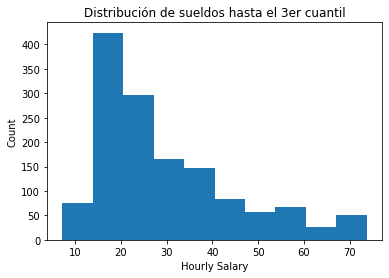

In [ ]:
quantil = np.quantile(best_jobs['hourly_salary'], 0.95)
print(quantil)
plt.hist(best_jobs['hourly_salary'], bins = 10, range = (7.25, quantil))
plt.xlabel("Hourly Salary")
plt.ylabel("Count")
plt.title("Distribución de sueldos hasta el 3er cuantil")
plt.show()

73.71587499999991


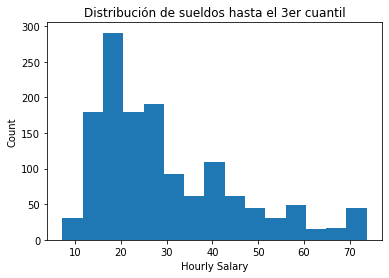

In [ ]:
quantil = np.quantile(best_jobs['hourly_salary'], 0.95)
print(quantil)

plt.hist(best_jobs['hourly_salary'], bins = 15, range = (7.25, quantil))
plt.xlabel("Hourly Salary")
plt.ylabel("Count")
plt.title("Distribución de sueldos hasta el 3er cuantil")
plt.show()

73.71587499999991


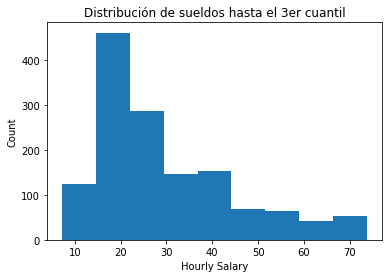

In [ ]:
quantil = np.quantile(best_jobs['hourly_salary'], 0.95)
print(quantil)

plt.hist(best_jobs['hourly_salary'], bins = 9, range = (7.25, quantil))
plt.xlabel("Hourly Salary")
plt.ylabel("Count")
plt.title("Distribución de sueldos hasta el 3er cuantil")
plt.show()

In [ ]:
best_jobs = best_jobs.drop(best_jobs[(best_jobs.title.isnull()) | (best_jobs.region.isnull())].index)
best_jobs = best_jobs.drop(best_jobs[(best_jobs.hourly_salary > quantil)].index)


Se convierten los valores que se tienen de sueldos a un sueldo por hora.

In [ ]:
def salary_classes(hourly_salary, min, max):
  """
  Convierte los sueldos a un valor de sueldo por hora.
  """
  limits = np.linspace(min, max, num=10)

  if (hourly_salary > limits[0]) & (hourly_salary <= limits[1]):
    return 1
  elif (hourly_salary > limits[1]) & (hourly_salary <= limits[2]):
    return 2
  elif (hourly_salary > limits[2]) & (hourly_salary <= limits[3]):
    return 3
  elif (hourly_salary > limits[3]) & (hourly_salary <= limits[4]):
    return 4
  elif (hourly_salary > limits[4]) & (hourly_salary <= limits[5]):
    return 5
  elif (hourly_salary > limits[5]) & (hourly_salary <= limits[6]):
    return 6
  elif (hourly_salary > limits[6]) & (hourly_salary <= limits[7]):
    return 7
  elif (hourly_salary > limits[7]) & (hourly_salary <= limits[8]):
    return 8
  elif (hourly_salary > limits[8]) & (hourly_salary <= limits[9]):
    return 9

best_jobs['salary_class'] = best_jobs.apply(lambda x: 
                                                   salary_classes(hourly_salary=x['hourly_salary'], min=7.25, max=best_jobs.hourly_salary.max()), axis=1)

In [ ]:
best_jobs.shape
best_jobs.to_csv("best_jobs_without_null_salary.csv")

## Procesamiento de variables - Mejora Hito 1 (stopword)

In [ ]:
#código stopword
#standard import form used
import pandas as pd 
import numpy as np
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string, strip_punctuation
import sys


In [ ]:
# Removemos las stopwords del texto. Stopwords son palabras que no tienen un sentido por si solas.
# Normalmente son un grupo de articulos, pronombres, preposiciones, adverbios, entre otros.
# Gensim tiene esta funcion con una base de stopwords ya creada, simplemente llamamos a la funcion.

best_jobsUS_df = best_jobs

a=best_jobsUS_df['title']
b=[]

for i in a:
  b.append(remove_stopwords(i))

e = best_jobsUS_df['skills'].astype(str)
f=[]

for i in e:
  f.append(remove_stopwords(i))

i = best_jobsUS_df['description'].astype(str)
j = []

for k in i:
  j.append(remove_stopwords(k))

In [ ]:
# Removemos la puntuacion de las palabras
c=[]
for i in b:
  c.append(strip_punctuation(i))

g = []

for i in f:
  g.append(strip_punctuation(i))

k=[]

for i in j:
  k.append(strip_punctuation(i))

In [ ]:
# Transformamos todas las palabas a minusculas
import nltk

d=[]
for i in c:
  d.append(i.lower())

h =[]

for i in g:
  h.append(i.lower())


  
l = []
for i in k:
  l.append(i.lower())

In [ ]:
# Ahora, buscamos acortar la palabra a solo su palabra raiz, para ello utilizamos
# la funcion snowballStemmer de la libreria NLTK la cual nos permitirá crear
# un pequeño algoritmo que realice este trabajo. Solo necesitamos pasarle el
# idioma en el que esta el texto.

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

import re
import os
import codecs
from sklearn import feature_extraction


# Creamos 2 algortimos. Uno que tokeniza y corta la palabras a su raiz, y otro que
# simplemente tokeniza las palabras.

# Tokenizar es romper el texto en las palabras que lo componen.

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token) # Agregamos los tokens a la lista
    stems = [stemmer.stem(t) for t in filtered_tokens] # Cortamos a la raiz el token
    return stems # retornamos la lista de palabras tokenizadas y cortadas


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token): # Filtramos los que sean numeros o puntuaciones
            filtered_tokens.append(token) # Agregamos los tokens a la lista
    return filtered_tokens # Retornamos la lista de tokens

nltk.download('punkt')

# Creamos dos vocabularios uno cortado a raiz y otro simplemente tokenizado

totalvocab_stemmed_title = [] # Cortado a la raiz
totalvocab_tokenized_title = [] # Tokenizado solamente

# Iteramos sobre la lista con las palabras en minusculas
for i in d: # i: Titulo en minusculas
  allwords_stemmed = tokenize_and_stem(i) # Cortamos y tokenizamos a la raiz
  totalvocab_stemmed_title.extend(allwords_stemmed) # Añadimos todas las palabras al vocabulario
    
  allwords_tokenized = tokenize_only(i) # Simplemente tokenizamos
  totalvocab_tokenized_title.extend(allwords_tokenized) # Agregamos las palabras al vocabulario


totalvocab_stemmed_skills = []
totalvocab_tokenized_skills = []

for i in h:
  allwords_stemmed = tokenize_and_stem(i)
  totalvocab_stemmed_skills.extend(allwords_stemmed)

  allwords_tokenized = tokenize_only(i)
  totalvocab_tokenized_skills.extend(allwords_tokenized)

totalvocab_stemmed_desc = []
totalvocab_tokenized_desc = []

for i in l:
  allwords_stemmed = tokenize_and_stem(i)
  totalvocab_stemmed_desc.extend(allwords_stemmed)

  allwords_tokenized = tokenize_only(i)
  totalvocab_tokenized_desc.extend(allwords_tokenized)

# Creamos un dataframe con las palabras tokenizadas, utilizando la raiz como indice
# Sirve para tener una manera facil de ver una raiz y transformarlo a una palabra

vocab_frame = pd.DataFrame({'words': totalvocab_tokenized_title}, index = totalvocab_stemmed_title)
print('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

vocab_frame_skills = pd.DataFrame({'words': totalvocab_tokenized_skills}, index=totalvocab_stemmed_skills)
print('there are ' + str(vocab_frame_skills.shape[0]) + ' items in vocab_frame_skills')

vocab_frame_desc = pd.DataFrame({'words': totalvocab_tokenized_desc}, index=totalvocab_stemmed_desc)
print('there are ' + str(vocab_frame_desc.shape[0]) + ' items in vocab_frame_desc')

## Clusters

In [ ]:
# Ahora, creamos una matriz tf-idf (term frequency-inverse document frequency)
# Para obtenerla, primero contamos las frecuencias de las palabras en el documento. Esto se 
# transforma en una matriz de documentos y terminos (DTM), tambien llamada matriz  
# de frecuencia de termino.

# Para ello, primero definimos el vectorizador que realizará el trabajo de
# generar la matriz

from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
# max_df: Porcentaje maximo de presencia del termino en el documento (Debe tener como maximo un 80%, si es mayor a esto, probablemente la palabra no tiene mucho sentido)
# min_df: Porcentaje minimo de presencia del termino en el documento
# ngram_range: N-grama a buscar (Unigrama, bigrama, trigrama, etc...)

# Contando solo unigramas
tfidf_vectorizer_unigram = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_only, ngram_range=(1,1))

# Contando solo bigramas
tfidf_vectorizer_bigram = TfidfVectorizer(max_df=0.8, max_features=200000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenize_only, ngram_range=(2,2))

# Creamos la matriz sobre la lista con las palabras en minusculas
%time tfidf_matrix_unigram = tfidf_vectorizer_unigram.fit_transform(best_jobsUS_df['title'])

%time tfidf_matrix_bigram = tfidf_vectorizer_bigram.fit_transform(best_jobsUS_df['title'])

print(tfidf_matrix_unigram.shape, tfidf_matrix_bigram.shape)

In [ ]:
# Lista de features usadas en la matriz tf-idf

terms = tfidf_vectorizer_unigram.get_feature_names()
terms2 = tfidf_vectorizer_bigram.get_feature_names()
print(terms)
print(terms2)

In [ ]:
# Las distancias de la matriz medidas con similitud de coseno
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(tfidf_matrix_unigram)
dist2 = 1-cosine_similarity(tfidf_matrix_bigram)
print(dist, '\n')
print('\n')
print(dist2)

In [ ]:
# Ahora, haremos un metodo del codo para elegir el numero de clusters a correr
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Metodo del codo para unigramas
sse1 = []

clusters = list(range(1, 30))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix_unigram)
    sse1.append(kmeans.inertia_)

plt.plot(clusters, sse1, marker="o")
plt.title("Metodo del codo de 1 a 75 clusters")
plt.grid(True)
plt.show()

In [ ]:
# Metodo del codo para bigramas
sse2 = []

clusters = list(range(1, 30))
for k in clusters:
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix_bigram)
    sse2.append(kmeans.inertia_)

plt.plot(clusters, sse2, marker="o")
plt.title("Metodo del codo de 1 a 20 clusters BIGRAMAS")
plt.grid(True)
plt.show()

Podemos notar que después de 25 el SSE de decrece muy poco, por lo que nos quedaremos con K=25

In [ ]:
# Ahora, reducimos la dimensionalidad de los datos para poder graficar el clustering
from sklearn.decomposition import TruncatedSVD

# Usaremos Singular-Value Decomposition que es una tecnica de reduccion de dimension
# para matrices que normalmente se utiliza en matrices de conteo de 
# terminos / tf-idf. En este ambito, este proceso es conocido como 
# Latent Semantic Analysis (LSA).

# Utilizamos TruncatedSVD 

new_X1 = TruncatedSVD(n_components=2).fit_transform(tfidf_matrix_unigram) # reduccion con unigramas
new_X2 = TruncatedSVD(n_components=2).fit_transform(tfidf_matrix_bigram) # reduccion con bigramas

# Generamos el cluster y vemos los labels de la data
kmean1 = KMeans(n_clusters=50).fit(new_X1) # kmeans con Unigramas
kmean2 = KMeans(n_clusters=50).fit(new_X2) # kmeans con bigramas

print("Numero total de datos: " + str(kmean1.labels_.size))
print("Labels del cluster: " + '\n')
print(kmean1.labels_, '\n')

print("Numero total de datos: " + str(kmean2.labels_.size))
print("Labels del cluster: " + '\n')
print(kmean2.labels_, '\n')

In [ ]:
#se agrega el cluster
clusters=kmean1.labels_
best_jobsUS_df['clusters'] = kmean1.labels_.tolist()
title_clusters = best_jobsUS_df.copy()
title_clusters.head()

In [ ]:
# Graficamos el cluster par unigrasmas

plt.scatter(new_X1[:, 0], new_X1[:, 1], c=kmean1.labels_)
plt.title("K-Means, K=17, UNIGRAMAS")
plt.show()

Cantidad de datos por cluster:

In [ ]:
# Creamos diccionarios para guardar los valores del modo (cluster: # de repeticiones)
val_kmeans = {}

for i in kmean1.labels_:
    val_kmeans[i] = np.count_nonzero(kmean1.labels_ == i)

print('Con reduccion de dimension: \n')
for v in val_kmeans:
    print('Cluster:', v, 'contiene: ', val_kmeans[v], " elementos")

Ahora graficamos Kmeans con los bigramas, utilizano K=17:

In [ ]:
# Graficamos el cluster

plt.scatter(new_X2[:, 0], new_X2[:, 1], c=kmean2.labels_)
plt.title("K-Means para bigramas con K=17")
plt.show()

Cantidad de datos por cluster:

In [ ]:
# Creamos diccionarios para guardar los valores del modo (cluster: # de repeticiones)
val_kmeans2 = {}

for i in kmean2.labels_:
    val_kmeans2[i] = np.count_nonzero(kmean2.labels_ == i)

print('Con reduccion de dimension: \n')
for v in val_kmeans2:
    print('Cluster:', v, 'contiene: ', val_kmeans2[v], " elementos")

Realizamos ahora un analisis utilizando el algoritmo de DBSCAN para realizar nuestros clusters:

In [ ]:
from sklearn.neighbors import NearestNeighbors

nbrs = NearestNeighbors(n_neighbors=3).fit(tfidf_matrix_unigram)
distances, indices = nbrs.kneighbors(tfidf_matrix_unigram)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.axhline(y=0.01, color='r', linestyle='--') #Ajuste el valor para "y" en esta línea
plt.plot(distances)
from sklearn.cluster import DBSCAN
eps = 0.01
min_samples = 5

dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(tfidf_matrix_unigram)

In [ ]:
plt.scatter(new_X1[:, 0], new_X1[:, 1], c=dbscan.labels_)
plt.title("Clusterizacion con DBSCAN")
plt.show()

Para validar la asignacion del cluster ocuparemos el coeficiente de Silhouette. A continuacion, calcularemos el coeficiente y lo graficaremos:

In [ ]:
from sklearn.metrics import silhouette_score, silhouette_samples

# Utilizamos el codigo adjunto en el tutorial 3 del ramo para graficar:

def plot_silhouette(dataset, model, ax1=None, ax2=None):
    use_indices = model.labels_ >= 0
    use_labels = model.labels_[use_indices]
    use_data = dataset[use_indices]

    n_clusters = len(np.unique(use_labels))

    if ax1 is None or ax2 is None:
        fig, (ax1, ax2) = plt.subplots(1, 2)

    silhouette_avg = silhouette_score(use_data, use_labels)
    print(f"The average silhouette_score for {model.__class__.__name__} is : {silhouette_avg}")
    sample_silhouette_values = silhouette_samples(use_data, use_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[use_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                            0, ith_cluster_silhouette_values, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title(f"{model.__class__.__name__}")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])

    ax2.scatter(use_data[:, 0], use_data[:, 1], c=use_labels)

def plot_multiple(dataset, models):
    n_models = len(models)
    
    fig, axs = plt.subplots(n_models, 2, figsize=(10, 5 * n_models))

    for i, (ax1, ax2) in enumerate(axs):
        plot_silhouette(dataset, models[i], ax1=ax1, ax2=ax2)

plot_multiple(new_X1, [kmean1, dbscan])

En conclusión y a modo de resumen:

Del análisis, elegimos quedarnos con KNN ya que tiene mejores métricas, nos guiamos principalmente por el coeficiente de silhouette. Además que con KNN encontramos el parámetro EPS óptimo.

El parámetro de KNN lo elegimos con el método del codo, que es de un K = 160

## Entrenamiento

### Creación clases

En primer lugar se crean las clases númericas para los datos que queremos utilizar para el entrenamiento. En este caso, queremos predecir "salary_class", que nos indica un rango de salario. Se entrenarán modelos para hacer la clasificación a partir de los siguientes datos: 

- Región (estado en el caso de US).
- Bloque horario.
- Título, usando los clusters obtenidos anteriormente.

En primer lugar, generamos las clases numéricas para los datos de "region" y de "bloque_horario".

In [ ]:
title_clusters['hour_class']=title_clusters['bloque_horario'].map({'ma�ana':0,'tarde':1,'noche':2,'madrugada':3})

In [ ]:
_, title_clusters['region_class'] = np.unique(title_clusters['region'], return_inverse=True)

Antes de entrenar el modelo, hacemos undersampling y oversampling del conjunto de entrenamiento de los datos a ocupar. Cuando se haga el entrenamiento, se determinará que conjunto (original, undersampleado o oversampleado) se comporta mejor. 

Se define la función _oversampling_, que utiliza el método SMOTE de la librería _imblearn_ para hacer un balanceo de las clases usando oversampling.

También se define la función _undersampling_ que, utilizando el método ClusterCentroids de _imblearn_ para realizar un undersample de las clases.

In [ ]:
from imblearn.over_sampling import SMOTE 
from imblearn.under_sampling import ClusterCentroids 

def oversampling(X, y):
  sm = SMOTE(random_state=20)
  X_res, y_res = sm.fit_resample(X, y)
  return X_res, y_res

def undersampling(X, y):
  cc = ClusterCentroids(random_state=40)
  X_res, y_res = cc.fit_resample(X, y)
  return X_res, y_res


### Elección de clasificador

Para elegir que clasificador se utilizará para entrenar el modelo, se compararán clasificadores usando la función "run_classifier", que recibe los conjuntos de entrenamiento y testing, y realiza una cantidad _num_tests_ de pruebas. Para comparar usaremos la métricas "precision", "f1-score" y "recall".

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB  # naive bayes
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC  # support vector machine classifier
from sklearn.metrics import f1_score, recall_score, precision_score

def run_classifier(clf, X_train, y_train, X_test, y_test, num_tests=100):
    metrics = {'f1-score': [], 'precision': [], 'recall': []}
    
    for _ in range(num_tests):
        ##X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30)
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        
        metrics['y_pred'] = predictions
        metrics['f1-score'].append(f1_score(y_test, predictions, average='micro')) 
        metrics['recall'].append(recall_score(y_test, predictions, average='micro'))
        metrics['precision'].append(precision_score(y_test, predictions, average='micro'))
    
    return metrics

La función anterior la ocuparemos con 4 clasificadores; en donde el clasificador "DummyClassifier" será nuestro baseline. Cada una de estas pruebas se realizará usando el conjunto original, así como también los conjuntos creados usando oversampling y undersampling, para poder decidir que conjunto tiene mejor desempeño. 

Todo esto se hará en la función _compare_classifiers_ que recibe los conjuntos originales, con undersampling y con oversampling, entrena usando los diferentes clasificadores y imprime los resultados.

In [ ]:
def compare_classifiers(original_sample, undersample, oversample):

  c0 = ("Base Dummy", DummyClassifier(strategy='stratified'))
  c1 = ("Decision Tree", DecisionTreeClassifier(max_depth=5))
  c2 = ("Gaussian Naive Bayes", GaussianNB())
  c3 = ("KNN", KNeighborsClassifier(n_neighbors=10))
  c4 = ("Support Vector Machines", SVC())

  classifiers = [c0, c1, c2, c3]

  samples = [[original_sample[0], original_sample[1], "Original"], 
             [undersample[0], undersample[1], "Undersampled"], 
             [oversample[0], oversample[1], "Oversampled"]]

  results = {}
  for name, clf in classifiers:
    for sample in samples: 
        metrics = run_classifier(clf, sample[0], sample[1], X_test, y_test)  
        results[name] = metrics
        print("------", sample[2], "------")      
        print("----------------")
        print("Resultados para clasificador: ", name) 
        print("Precision promedio:", np.array(metrics['precision']).mean())
        print("Recall promedio:", np.array(metrics['recall']).mean())
        print("F1-score promedio:", np.array(metrics['f1-score']).mean())
        print("----------------\n\n")  

### Experimentos



#### Sueldo según la región de la oferta de trabajo

Se crean los conjuntos de training y testing, y se les aplica oversampling y undersampling.

In [ ]:
from sklearn.model_selection import train_test_split
## Se definen las clases
X = title_clusters[['region_class']]
y = title_clusters['salary_class']
## Se crean los conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=37,
                                                    stratify=y)
X_sub, y_sub = undersampling(X_train, y_train)

X_over, y_over = oversampling(X_train, y_train)

Se hace la predicción usando _compare_classifiers_ y se observan los resultados.

In [ ]:
compare_classifiers([X_train, y_train], [X_sub, y_sub], [X_over, y_over])

Para este caso, el clasificador Gaussian Naive Bayes con f1-score de 0.306, usando el conjunto original es el que entregó mejores resultados, para todas las métricas.

#### Sueldo según la hora de publicación de la oferta

Se crean los conjuntos de training y testing, y se les aplica oversampling y undersampling.

In [ ]:
from sklearn.model_selection import train_test_split
## Se definen las clases
X = title_clusters[['hour_class']]
y = title_clusters['salary_class']
## Se crean los conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=37,
                                                    stratify=y)
X_sub, y_sub = undersampling(X_train, y_train)

X_over, y_over = oversampling(X_train, y_train)

Se hace la predicción usando _compare_classifiers_ y se observan los resultados.

In [ ]:
compare_classifiers([X_train, y_train], [X_sub, y_sub], [X_over, y_over])

El mejor clasificador para este exprimento fue KNN, con un f1-score de 0.30 usando el conjunto oversampled. 

#### Sueldo según el título de la oferta

Se crean los conjuntos de training y testing, y se les aplica oversampling y undersampling.

In [ ]:
from sklearn.model_selection import train_test_split
## Se definen las clases
X = title_clusters[['clusters']]
y = title_clusters['salary_class']
## Se crean los conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=37,
                                                    stratify=y)
X_sub, y_sub = undersampling(X_train, y_train)

X_over, y_over = oversampling(X_train, y_train)

Se hace la predicción usando _compare_classifiers_ y se observan los resultados.

In [ ]:
compare_classifiers([X_train, y_train], [X_sub, y_sub], [X_over, y_over])

El mejor clasificador para el caso del título fue Decision Tree Original, con un f1-score de 0.377

#### Sueldo todas las variables anteriores

Usando un dataset con todas las variables usadas anteriormente como nuestro conjunto X, se crean los conjuntos de training y testing, y se les aplica oversampling y undersampling.

In [ ]:
from sklearn.model_selection import train_test_split
## Se definen las clases
X = title_clusters[['clusters', 'hour_class', 'region_class']]
y = title_clusters['salary_class']
## Se crean los conjuntos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=37,
                                                    stratify=y)
X_sub, y_sub = undersampling(X_train, y_train)

X_over, y_over = oversampling(X_train, y_train)

Se hace la predicción usando _compare_classifiers_ y se observan los resultados.

In [ ]:
compare_classifiers([X_train, y_train], [X_sub, y_sub], [X_over, y_over])

Entrenando el modelo con todos los datos ("hour_class", "region_class" y "clusters"), el clasificador con mejor rendimiento fue el Decision Tree con un f1-score de 0.363 con el conjunto original.

### Conclusiones

En las tres variables en que se aplicaron clasificadores, se obtuvieron valores cercanos a 0.3 con distintos métodos. Esto nos indica que las predicciones que se pueden obtener no serán muy buenas. Una de las posibles razones es que después de limpiar el dataset de datos nulos o no reportados, la cantidad de datos bajó considerablemente, por lo que no habían los suficientes datos para entrenar un modelo de forma óptima. Otra posible razón es que las variables utilizadas no tuviesen una correlación considerable.

## Pregunta 2

Si tengo un conjunto de skills, ¿Qué skill podría desarrollar para optar a un mejor sueldo?

Objetivo

- Predecir el sueldo en base a las skills
- Según el sueldo predecir qué skills se deben tener
- Explorar clusters

En el dataset, la variable de skills contiene una lista de skills relacionadas al cargo, en el contexto de esta pregunta vamos a necesitar un mayor nivel de detalle para esta variable, por lo que se creará una variable por cada skill relacionada al cargo, por ejemplo, una instancia del dataset tiene la variable skills con los siguientes datos: Protocol (Science), Maintenance. Ahora esa instancia tendría 2 variables, una que contenga Protocol (Science) y otra que diga Maintenance. También, se le asignará una variable descriptiva a los sueldos, de esta manera se podrán clasificar de mejor manera, los sueldos se dividirán en tramos de: sueldo bajo, sueldo medio y sueldo alto.

Dado que esta pregunta  es de carácter predictivo, nos focalizaremos de manera particular en clasificación, donde proponemos utilizar nuestro dataset para crear un modelo que permita estimar el tramo de un sueldo (bajo, medio, alto) a partir de un conjunto de skills y también evaluar la opción inversa, es decir, si a partir del sueldo podemos estimar las skills necesarias.

Para evaluar la calidad de la clasificación compararemos diversos algoritmos, utilizaremos las métricas tradicionales como F1, precision y recall, aplicando k-fold cross validation o un particionado de 80-20 para entrenamiento y testeo respectivamente. Nuestra idea de esto es no sobre-ajustar el modelo y este aprenda de subsets de entrenamiento distintos.

También aplicaremos técnicas de clustering para encontrar de manera natural si las características de nuestro dataset son suficientes para encontrar grupos de skills similares teniendo en cuenta su sueldo (bajo, medio, alto) 

Probaremos múltiples combinaciones en el número de clúster así como distintos enfoques de clustering (jerárquico y particional). También probaremos usando distintos subconjuntos de atributos al hacer clustering para evaluar si los ejemplos se agrupan de manera distinta cuando consideramos información diferente.

Para evaluar los clusters, utilizaremos el enfoque visual así como también la estimación de métricas tales como cohesión y separación.


COMENTARIO: Para la pregunta 2, creo que la parte de clustering está bien, pero solo utilizando el sueldo para predecir grupos de skills, no tienen mucho sentido. Creo que deben complementar con más variables aquello en caso de ser posible. Por ejemplo, mencionan "usaremos distintos subconjuntos de atributos". La pregunta de fondo es qué atributos utilizarán para ello

In [ ]:
# Creamos un dataframe que contenga los skills y conteos de sueldo por cada skill
# Hacemos un clustering utilizando las dos variables, luego hacemos reduccion de dimension para poder graficarlo
# Sacamos las medidas con silhouette
# Concluimos
vocab_frame_skills